In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset


import pandas as pd

#url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
#data = pd.read_csv(url)

import requests

url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
response = requests.get(url)
response.raise_for_status()

# Specify the local file path to save the CSV file
csv_file_path = 'C:/Users/ADMIN/Desktop/flip/data.csv'

# Save the raw data to a local CSV file

#with open(csv_file_path,'C:/Users/ADMIN/Desktop/flip/data.csv') as file:
#file.write(response.text)

#print(f"CSV file saved to: {csv_file_path}")

import pandas as pd

# Specify the file path to the CSV file
#csv_file_path = 'C:/Users/ADMIN/Desktop/flip/data.csv'

# Read the CSV file into a DataFrame
#data = pd.read_csv(csv_file_path)
data = pd.read_csv(url)
data



,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data has 907 rows × 27 columns

In [9]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [10]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
data.shape

(907, 27)

data has 907 rows and 27 columns out of which 1 is target and remaining are independent variable

In [146]:
data.columns
data.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [147]:
print(data.dtypes)


country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object


Data type is object, and float 64

In [148]:
#checking the null values
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There area  null values in the data frame

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

<AxesSubplot:>

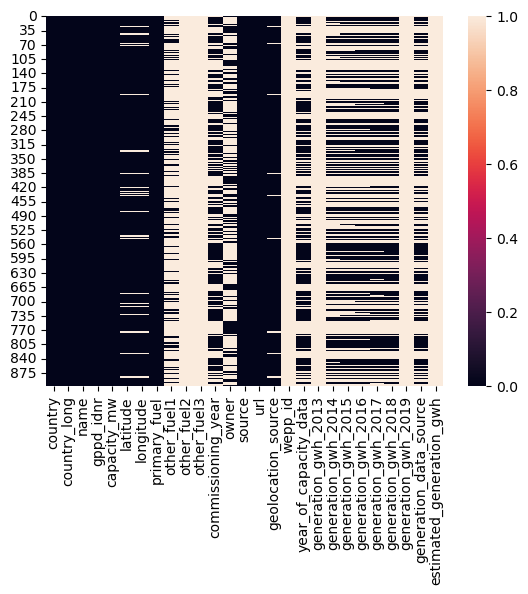

In [14]:
import seaborn as sns
sns.heatmap(data.isnull())

In [ ]:
there are null values as seen above also

In [16]:
# removing null values
import pandas as pd

# Check for null values
null_counts = data.isnull().sum()
print("Null Value Counts:")
print(null_counts)




Null Value Counts:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [11]:
# Replace null values with mean
data1 = data.fillna(data.mean())

# Display the DataFrame with filled values
print(data1)

    country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1  

C:\Users\Manisha\AppData\Local\Temp\ipykernel_17228\2526040416.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1 = data.fillna(data.mean())


<AxesSubplot:>

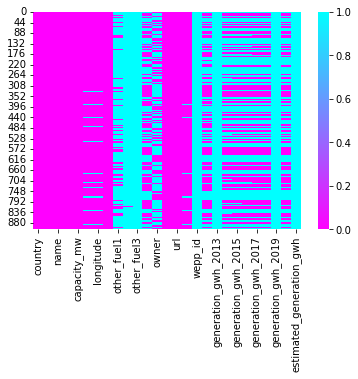

In [13]:
import seaborn as sns
sns.heatmap(data.isnull(),cmap="cool_r")

In [15]:
import numpy as np
data1["longitude"] = data1["longitude"].replace(" ", np.nan)

data1["other_fuel1"]=data1["other_fuel1"].replace(" ",np.nan)
data1["other_fuel3"] = data1["other_fuel3"].replace(" ", np.nan)


<AxesSubplot:>

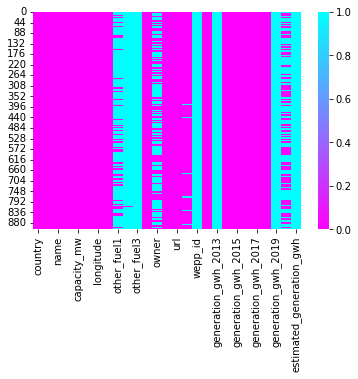

In [17]:
import seaborn as sns
sns.heatmap(data1.isnull(),cmap="cool_r")

In [18]:
import pandas as pd

# Assuming you have already imported the pandas library and have a DataFrame named data1

# Replace NaN values in the "longitude" column with a specific value (e.g., -1)
data1["longitude"].fillna(-1, inplace=True)

# Replace NaN values in the "other_fuel1" column with a specific value (e.g., "Unknown")
data1["other_fuel1"].fillna("1", inplace=True)

# Replace NaN values in the "other_fuel3" column with a specific value (e.g., 0)
data1["other_fuel3"].fillna(0, inplace=True)


<AxesSubplot:>

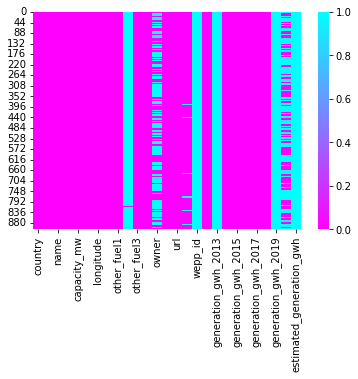

In [19]:
import seaborn as sns
sns.heatmap(data1.isnull(),cmap="cool_r")

In [22]:
data_without_nulls = data.drop("wepp_id", axis=1)


In [23]:


# Verify if null values have been removed
null_counts_after_removal = data_without_nulls.isnull().sum()
print("Null Value Counts After Removal:")
print(null_counts_after_removal)

Null Value Counts After Removal:
country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [29]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with columns containing NaN values

# Replace NaN values in all columns with the respective column means
data_filled = data.fillna(data.mean())


C:\Users\Manisha\AppData\Local\Temp\ipykernel_17228\3216055423.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_filled = data.fillna(data.mean())


In [31]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  907 non-null    float64
 6   longitude                 907 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        907 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [32]:
data_filled.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,907.000000,907.000000,0.0,907.000000,0.0,907.0,0.0,907.000000,907.000000,907.000000,907.000000,907.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.079148,4.812291,NaN,13.016360,NaN,0.0,NaN,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,17.072000,74.388900,NaN,1997.091082,NaN,2019.0,NaN,1211.362750,916.000000,896.500214,882.594850,824.842340,NaN,NaN
50%,59.200000,21.281800,76.979200,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
75%,385.250000,25.176450,79.206100,NaN,2003.000000,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [35]:
data_without_nulls = data.drop("generation_gwh_2013", axis=1)
data_without_nulls = data.drop("other_fuel3", axis=1)
data_without_nulls = data.drop("generation_gwh_2019", axis=1)
data_without_nulls = data.drop("wepp_id", axis=1)
data_without_nulls = data.drop("generation_gwh_2013", axis=1)
data_without_nulls = data.drop("estimated_generation_gwh", axis=1)

In [37]:
data_without_nulls.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [39]:
data_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   other_fuel2             1 non-null      object 
 10  other_fuel3             0 non-null      float64
 11  commissioning_year      527 non-null    float64
 12  owner                   342 non-null    object 
 13  source                  907 non-null    object 
 14  url                     907 non-null    ob

In [42]:
# to check unique vqlues
data['primary_fuel'].unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [43]:
data['primary_fuel'].nunique()# number of unique values


8

In [3]:
data['commissioning_year'].nunique()# number of unique values


73

In [4]:
data['estimated_generation_gwh'].nunique()# number of unique values

0

In [44]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

In [45]:
data["primary_fuel"].unique()
data.shape[0]


907

In [46]:
data.loc[data["primary_fuel"]==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [48]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [49]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
other_fuel2,1


In [50]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh'],
      dtype='object')


In [51]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


 data visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


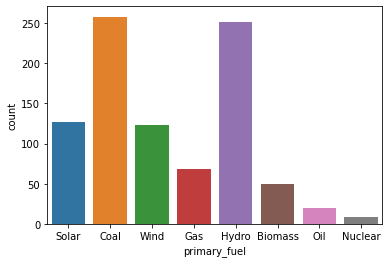

In [52]:

import seaborn as sns

if data["primary_fuel"].notnull().any():
    sns.countplot(x='primary_fuel', data=data)
    print(data["primary_fuel"].value_counts())
else:
    print("The 'primary_fuel' column does not contain any non-null values.")



5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


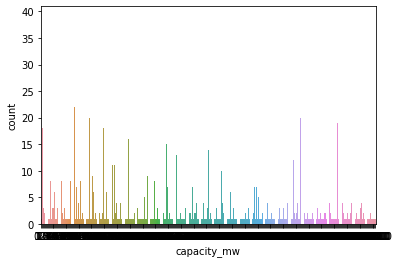

In [53]:

import seaborn as sns

if data["capacity_mw"].notnull().any():
    sns.countplot(x='capacity_mw', data=data)
    print(data["capacity_mw"].value_counts())
else:
    print("The 'capacity_mw' column does not contain any non-null values.")

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


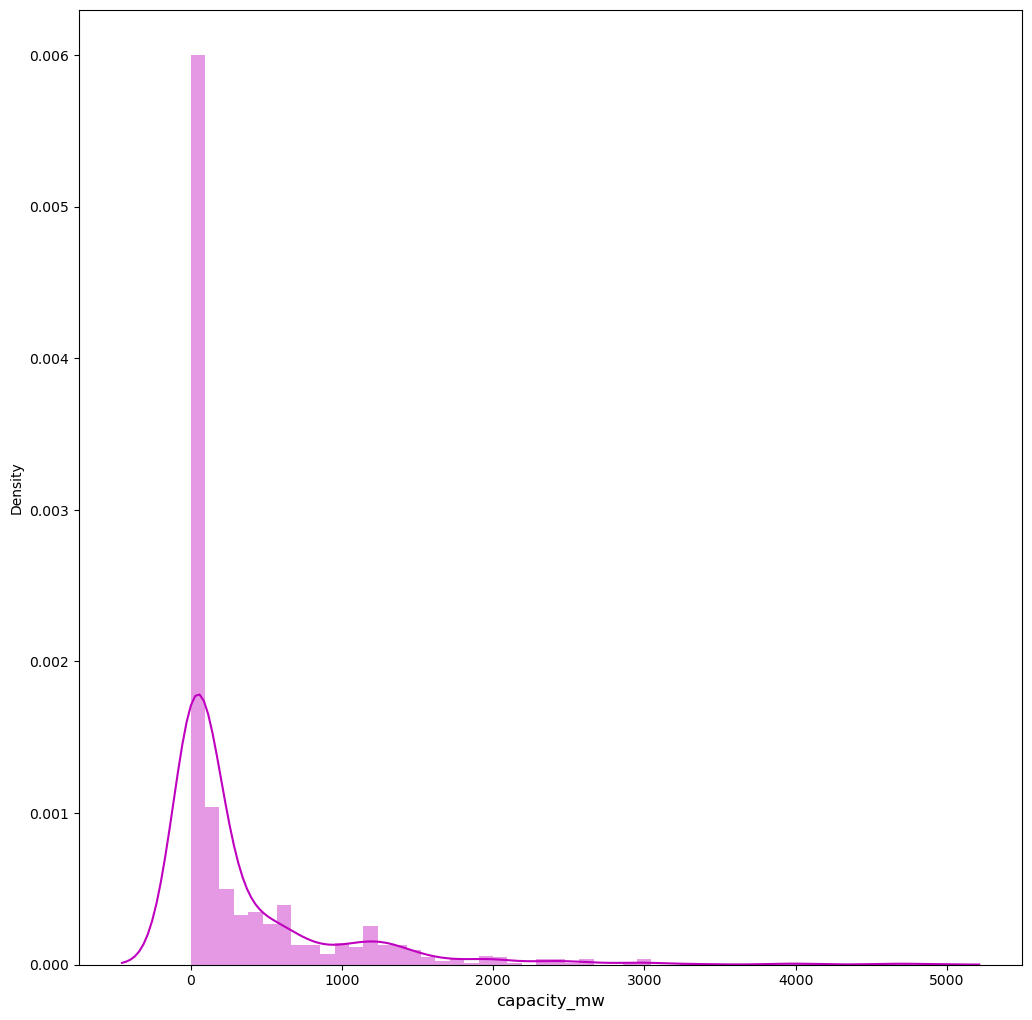

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


capacity is skewed towards left capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh

Multivariate Analysis

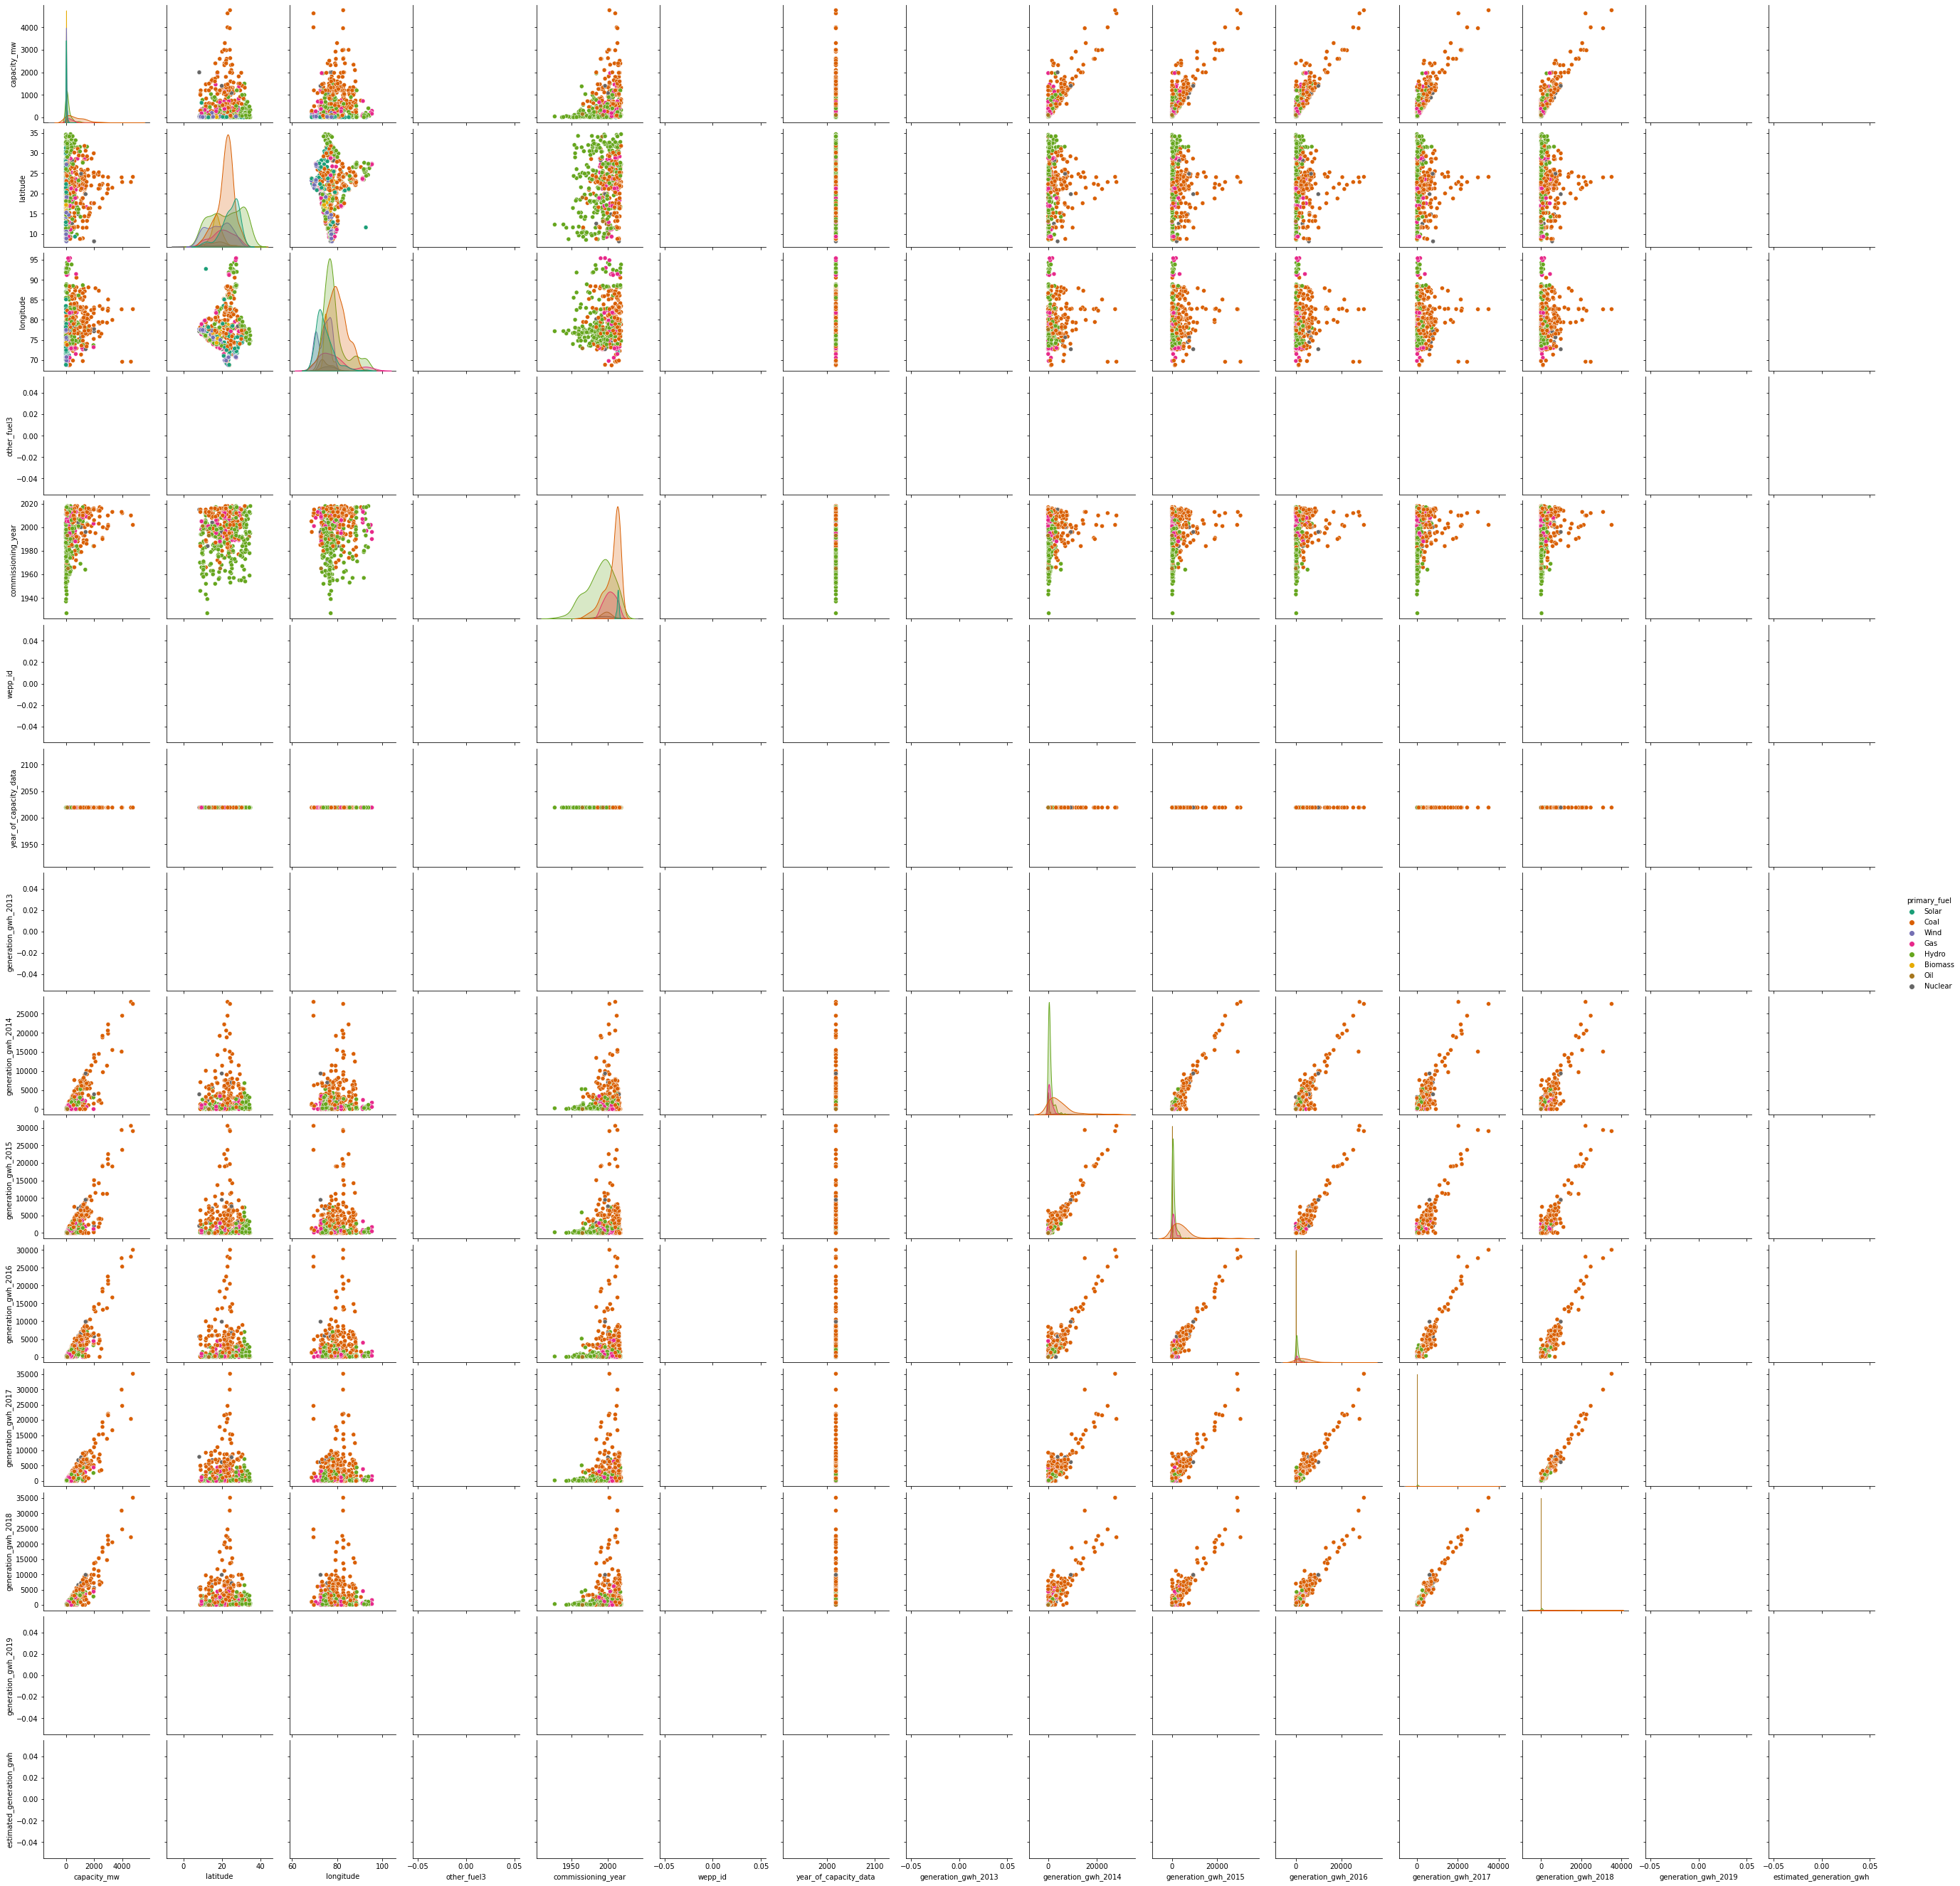

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the desired data

sns.pairplot(data, hue='primary_fuel', palette='Dark2')
plt.show()

C:\Users\Manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manisha\anaconda

ValueError: num must be 1 <= num <= 10, not 11

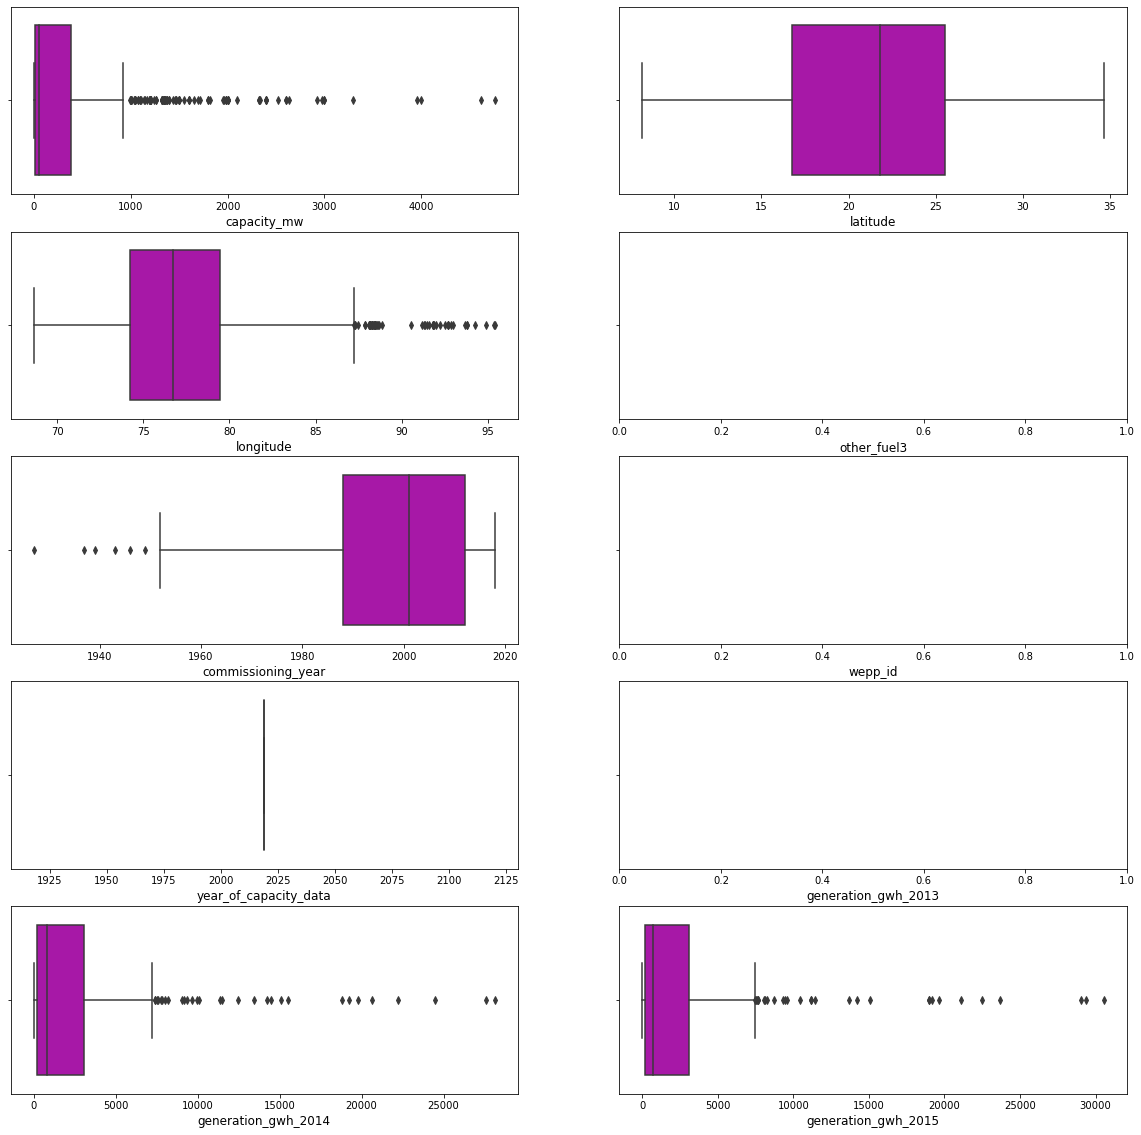

In [56]:
# Checking for outliners using box plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
numerical_columns = ['capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh'] # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+= 1

plt.tight_layout()
plt.show()

In [58]:
import numpy as np
from scipy.stats import zscore
data2=data_filled[['capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh']]
z=np.abs(zscore(data2))
z

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,0.548908,1.149805,0.878280,NaN,1.069162e+00,NaN,NaN,NaN,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,NaN,NaN
1,0.386977,0.587311,0.593788,NaN,1.747794e-14,NaN,NaN,NaN,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,NaN,NaN
2,0.486679,0.116179,1.682394,NaN,1.747794e-14,NaN,NaN,NaN,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,NaN,NaN
3,0.324240,0.439989,2.889052,NaN,5.310801e-01,NaN,NaN,NaN,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,NaN,NaN
4,2.498942,0.125479,1.027976,NaN,1.376637e+00,NaN,NaN,NaN,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,NaN,1.453505e+00,NaN,NaN,NaN,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,NaN,NaN
903,0.548060,1.366853,0.145644,NaN,1.747794e-14,NaN,NaN,NaN,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,NaN,NaN
904,0.509909,0.974707,0.391673,NaN,1.747794e-14,NaN,NaN,NaN,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,NaN,NaN
905,0.417498,0.518793,0.772866,NaN,1.747794e-14,NaN,NaN,NaN,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,NaN,NaN


In [59]:
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
        308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
        364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
        493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
        541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
        648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
        788, 807, 808, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880,
        880, 880, 880, 880], dtype=int64),
 array([ 0,  9, 10, 11, 12,  0,  8,  9, 10, 11, 12,  0,  8,  2,  2,  0,  8,
         9, 10, 11, 12,  4,  2,  0,  8,  9, 10, 11, 12,  2,  2,  2,  4,  2,
         0,  0,  8,  9, 10, 11, 12,  4,  0,  2,  2,  4,  4,  4,  0,  4,  0,

In [178]:
z.iloc[15,0]

3.906294028602196

In [180]:
print("data loss percentage:-",((data.shape[0])-data1.shape[0])/100)

data loss percentage:- 0.2


In [61]:
data.skew()#-05 to +0.5

C:\Users\Manisha\AppData\Local\Temp\ipykernel_17228\2128461393.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()#-05 to +0.5


capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [62]:
# Assuming you have a DataFrame named 'data' and you want to drop columns 'column1' and 'column2'

data.drop(['other_fuel3', 'wepp_id',"wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"], axis=1, inplace=True)


In [63]:
data.skew()#-05 to +0.5

C:\Users\Manisha\AppData\Local\Temp\ipykernel_17228\2128461393.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()#-05 to +0.5


capacity_mw              3.123576
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   other_fuel2             1 non-null      object 
 10  commissioning_year      527 non-null    float64
 11  owner                   342 non-null    object 
 12  source                  907 non-null    object 
 13  url                     907 non-null    object 
 14  geolocation_source      888 non-null    ob

In [65]:
import numpy as np
data['generation_gwh_2015'] = np.cbrt(data['generation_gwh_2015'])



In [66]:
data.skew()

C:\Users\Manisha\AppData\Local\Temp\ipykernel_17228\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


capacity_mw              3.123576
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      0.610728
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

C:\Users\Manisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


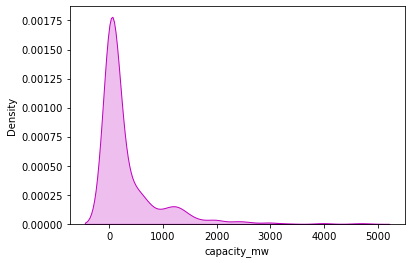

In [67]:
sns.distplot(data["capacity_mw"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


looks normal almost

Encoding Categorical Columns

In [69]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.0,657.0,2.5,28.1839,73.2407,6.0,NaN,NaN,...,109.0,128.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,519.0,98.0,24.7663,74.6090,1.0,NaN,NaN,...,174.0,173.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,2.0,853.0,39.2,21.9038,69.3732,7.0,NaN,NaN,...,21.0,205.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,NaN,NaN,...,22.0,58.0,2.0,2019.0,617.789264,9.449397,886.004428,663.774500,626.239128,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,NaN,...,22.0,58.0,2.0,2019.0,3035.550000,18.086385,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,902.0,491.0,1600.0,16.2949,77.3568,1.0,2.0,NaN,...,22.0,58.0,2.0,2019.0,NaN,0.998289,233.596650,865.400000,686.500000,0.0
903,0.0,0.0,903.0,822.0,3.0,12.8932,78.1654,6.0,NaN,NaN,...,77.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,0.0,0.0,904.0,891.0,25.5,15.2758,75.5811,7.0,NaN,NaN,...,21.0,260.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,0.0,0.0,905.0,539.0,80.0,24.3500,73.7477,1.0,NaN,NaN,...,59.0,82.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    float64
 1   country_long            907 non-null    float64
 2   name                    907 non-null    float64
 3   gppd_idnr               907 non-null    float64
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    float64
 8   other_fuel1             198 non-null    float64
 9   other_fuel2             1 non-null      float64
 10  commissioning_year      527 non-null    float64
 11  owner                   342 non-null    float64
 12  source                  907 non-null    float64
 13  url                     907 non-null    float64
 14  geolocation_source      888 non-null    fl

In [71]:
data.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,861.000000,861.000000,907.000000,198.000000,1.0,...,907.000000,907.000000,888.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000,449.0
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1.979798,0.0,...,43.847850,94.469680,1.727477,2019.0,2431.823590,10.181480,2467.936859,2547.759305,2600.804099,0.0
std,0.0,0.0,261.972645,261.972645,590.085456,6.239612,4.939316,2.280652,0.173340,NaN,...,44.642818,70.381222,0.683226,0.0,4026.440035,6.325646,4162.884308,4196.991169,4314.880456,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,226.500000,226.500000,16.725000,16.773900,74.256200,1.000000,2.000000,0.0,...,22.000000,58.000000,2.000000,2019.0,223.557672,5.607832,188.285252,177.874930,193.378250,0.0
50%,0.0,0.0,453.000000,453.000000,59.200000,21.780000,76.719500,3.000000,2.000000,0.0,...,22.000000,58.000000,2.000000,2019.0,801.123775,8.925864,737.205450,817.977250,751.644375,0.0
75%,0.0,0.0,679.500000,679.500000,385.250000,25.512400,79.440800,6.000000,2.000000,0.0,...,29.500000,115.500000,2.000000,2019.0,3035.306250,14.556058,3282.861313,3275.690475,3143.535900,0.0
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,0.0,...,190.000000,303.000000,2.000000,2019.0,28127.000000,31.257310,30015.000000,35116.000000,35136.000000,0.0


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [75]:
corr=data.corr()
corr

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.332205,0.060240,-0.138764,0.020806,0.040753,-0.152892,NaN,...,-0.014640,0.041917,0.033669,NaN,0.128813,0.070522,0.096807,0.107317,0.096205,NaN
gppd_idnr,NaN,NaN,0.332205,1.000000,-0.335742,-0.109151,-0.390045,0.609180,-0.133871,NaN,...,0.416384,0.597080,-0.485114,NaN,0.125509,0.066316,0.069549,0.057132,0.047537,NaN
capacity_mw,NaN,NaN,0.060240,-0.335742,1.000000,0.051309,0.197129,-0.380395,0.102111,NaN,...,-0.242122,-0.243830,0.209908,NaN,0.839094,0.754792,0.870620,0.886673,0.901918,NaN
latitude,NaN,NaN,-0.138764,-0.109151,0.051309,1.000000,0.036362,-0.010530,0.111527,NaN,...,0.056528,-0.136335,-0.185045,NaN,0.060330,0.114969,0.041387,0.040568,0.040476,NaN
longitude,NaN,NaN,0.020806,-0.390045,0.197129,0.036362,1.000000,-0.359060,0.135291,NaN,...,-0.241907,-0.315234,0.253397,NaN,0.013511,0.029643,0.050732,0.048678,0.045599,NaN
primary_fuel,NaN,NaN,0.040753,0.609180,-0.380395,-0.010530,-0.359060,1.000000,-0.514135,NaN,...,0.053613,0.589886,-0.511180,NaN,-0.405019,-0.482778,-0.408951,-0.421736,-0.421518,NaN
other_fuel1,NaN,NaN,-0.152892,-0.133871,0.102111,0.111527,0.135291,-0.514135,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.078586,0.114869,0.082999,0.065496,0.088659,NaN
other_fuel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


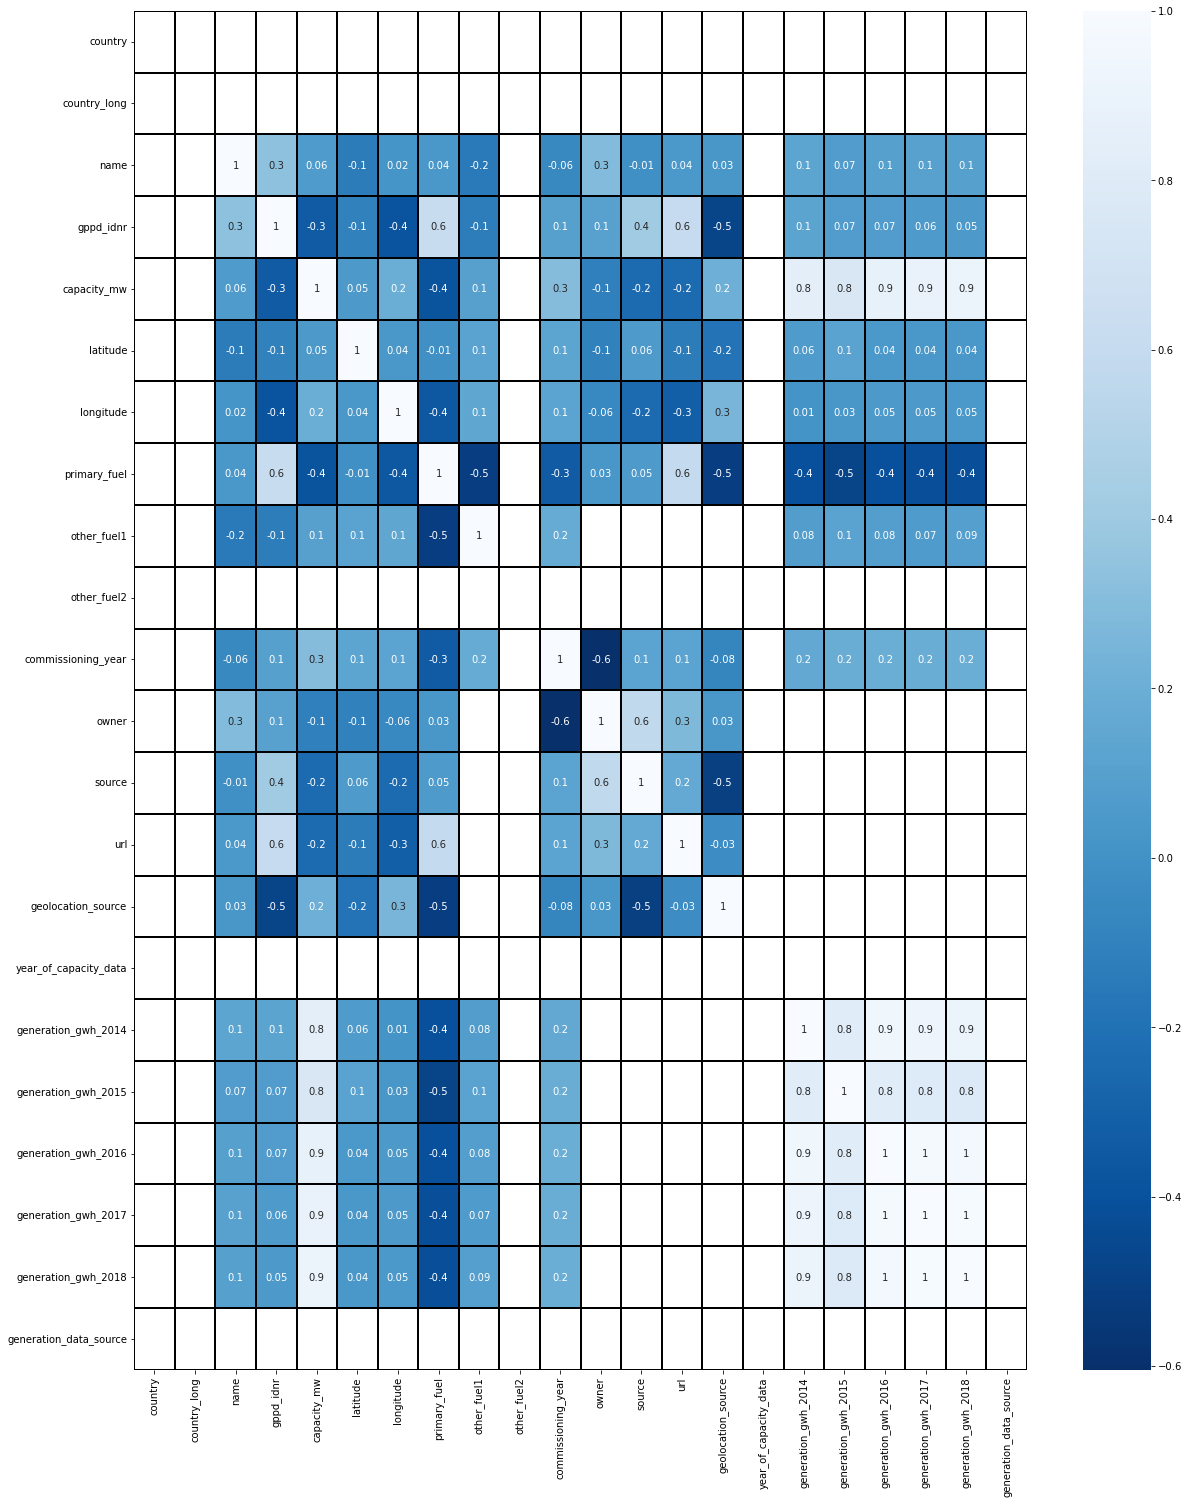

In [76]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. tOTAL VOLUME AND 4225 AND LARGE BAG HAVE POSITIVE CORELATION WITH TARGET. tYPE HAS HIGH CORELATION. 

In [77]:
corr["primary_fuel"].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.609180
url                       0.589886
source                    0.053613
name                      0.040753
owner                     0.029387
latitude                 -0.010530
commissioning_year       -0.336501
longitude                -0.359060
capacity_mw              -0.380395
generation_gwh_2014      -0.405019
generation_gwh_2016      -0.408951
generation_gwh_2018      -0.421518
generation_gwh_2017      -0.421736
generation_gwh_2015      -0.482778
geolocation_source       -0.511180
other_fuel1              -0.514135
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [78]:
corr["capacity_mw"].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2018       0.901918
generation_gwh_2017       0.886673
generation_gwh_2016       0.870620
generation_gwh_2014       0.839094
generation_gwh_2015       0.754792
commissioning_year        0.304087
geolocation_source        0.209908
longitude                 0.197129
other_fuel1               0.102111
name                      0.060240
latitude                  0.051309
owner                    -0.112952
source                   -0.242122
url                      -0.243830
gppd_idnr                -0.335742
primary_fuel             -0.380395
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

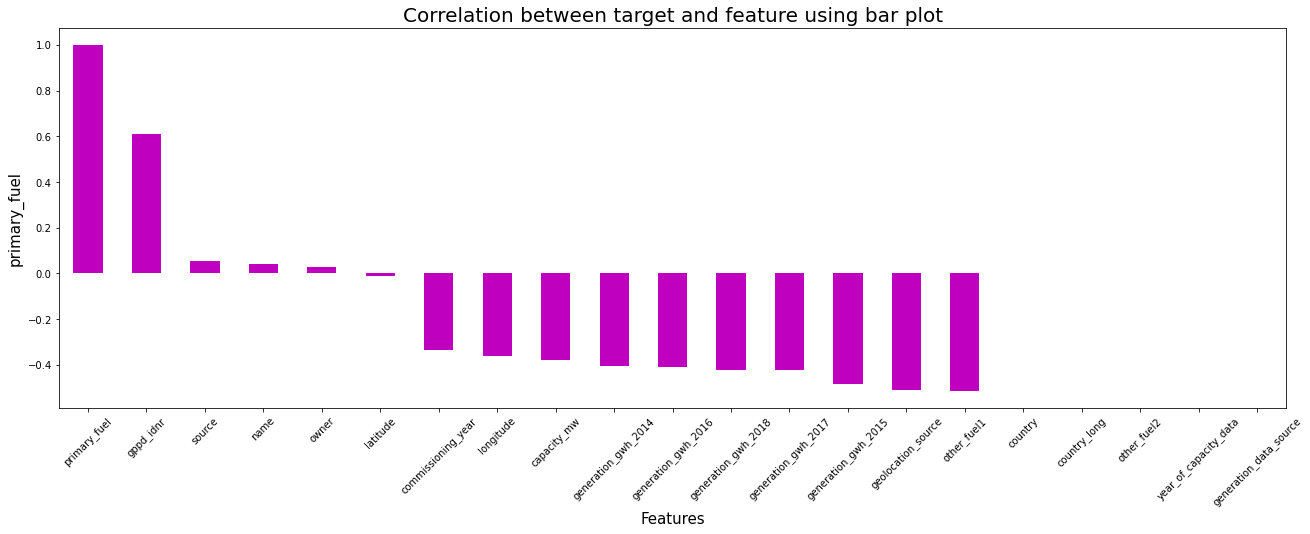

In [80]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["primary_fuel"].sort_values(ascending=False).drop(["url"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("primary_fuel", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


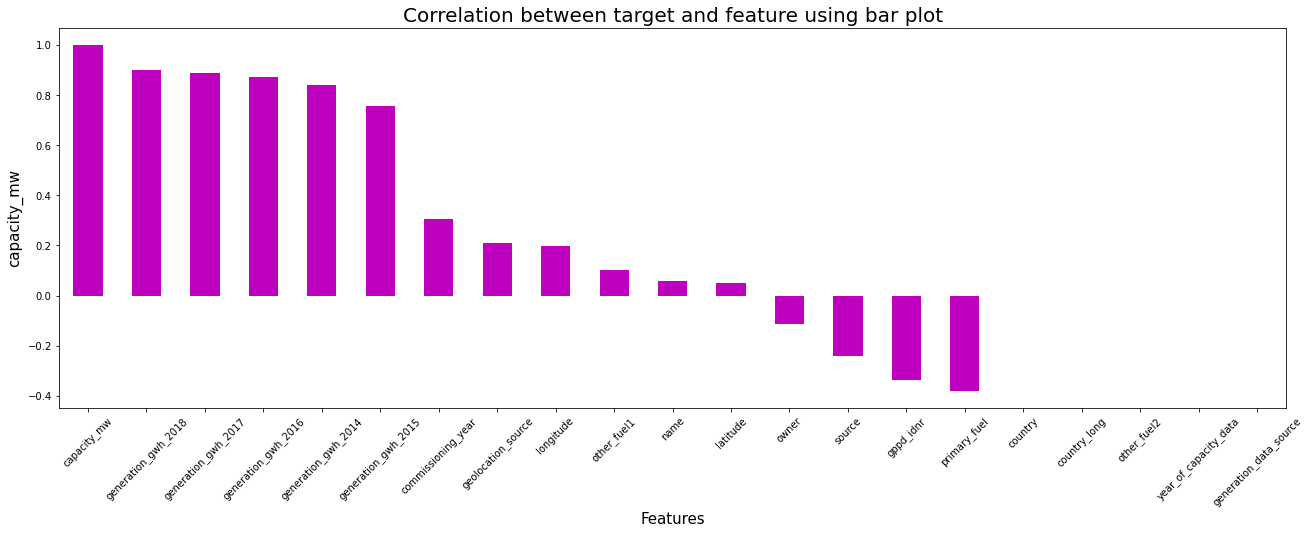

In [81]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["capacity_mw"].sort_values(ascending=False).drop(["url"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("capacity_mw", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()

Seprating featires and labels

In [86]:
x=data.drop("capacity_mw",axis=1)
y=data["capacity_mw"]

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,-1.730142,0.779137,1.120269,-0.855718,1.225688,NaN,NaN,0.814976,...,1.460215,0.476673,-1.065369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,-1.726323,0.252074,0.572224,-0.578535,-0.967877,NaN,NaN,NaN,...,2.917019,1.116401,0.399101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,-1.722504,1.527719,0.113195,-1.639177,1.664401,NaN,NaN,NaN,...,-0.512075,1.571318,0.399101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,-1.718684,-1.730142,0.428686,2.814837,-0.529164,NaN,NaN,0.404820,...,-0.489662,-0.518459,0.399101,0.0,-0.451098,-0.115870,-0.380447,-0.449400,-0.458129,0.0
4,0.0,0.0,-1.714865,-1.726323,0.122255,1.001569,-0.967877,0.116841,NaN,1.049352,...,-0.489662,-0.518459,0.399101,0.0,0.150129,1.251143,0.907885,0.676926,1.085413,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,1.714865,0.145133,-0.786246,-0.021900,-0.967877,0.116841,NaN,1.107945,...,-0.489662,-0.518459,0.399101,0.0,NaN,-1.453463,-0.537348,-0.401305,-0.444148,0.0
903,0.0,0.0,1.718684,1.409321,-1.331741,0.141902,1.225688,NaN,NaN,NaN,...,0.743019,-1.030242,-2.529838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,0.0,0.0,1.722504,1.672853,-0.949668,-0.381612,1.664401,NaN,NaN,NaN,...,-0.512075,2.353208,0.399101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,0.0,0.0,1.726323,0.328460,0.505466,-0.753013,-0.967877,NaN,NaN,NaN,...,0.339596,-0.177271,0.399101,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
print(x.shape)

(907, 21)


In [89]:
y.value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

MODELLING

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding on the categorical columns
# Separate the features (X) and target variable (y)
X = data.drop('capacity_mw', axis=1)
y = data['capacity_mw']

# Identify categorical columns for one-hot encoding
categorical_columns = ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']

transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = transformer.fit_transform(X) 

In [101]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Check if any rows remain in the dataset
if data.shape[0] == 0:
    raise ValueError("No rows remaining after dropping specified fuels.")

# Select the features and target variable
x = data.drop('capacity_mw', axis=1)
y = data['capacity_mw']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)





In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Check if any rows remain in the dataset
if data.shape[0] == 0:
    raise ValueError("No rows remaining after dropping specified fuels.")

# Select the features and target variable
x = data.drop('capacity_mw', axis=1)
y = data['capacity_mw']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Scale the features using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)

print('R2 score: ', r2_score(y_test, pred_lr))
print('R2 score on training data: ', r2_score(y_train, pred_train) * 100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error: ', mean_squared_error(y_test, pred_lr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred_lr)))




R2 score:  0.7927837598563292
R2 score on training data:  77.87639498545848
Mean Absolute Error:  197.43161767577337
Mean Squared Error:  87331.44402153486
Root Mean Squared Error:  295.51894020778917


In [104]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_RFR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8793781970248943
R2_score on training data:  97.57888675905394
Mean Absoloute Error:- 108.19439391941394
Mean Squared Error:- 50836.15177552387
Root Mean Squared Error:- 225.46873791176432


In [105]:
Knn=knn()
Knn.fit(x_train,y_train)
pred_Knn=Knn.predict(x_test)
pred_train=Knn.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_Knn))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_Knn))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_Knn))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_Knn)))

R2 score:  0.8132860281893419
R2_score on training data:  87.08087277731579
Mean Absoloute Error:- 134.8774249084249
Mean Squared Error:- 78690.74724025186
Root Mean Squared Error:- 280.5187110341338


In [106]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=Knn.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_GBR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_GBR)))

R2 score:  0.8132860281893419
R2_score on training data:  97.06401037831866
Mean Absoloute Error:- 134.8774249084249
Mean Squared Error:- 78690.74724025186
Root Mean Squared Error:- 280.5187110341338


In [107]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lasso))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lasso)))

R2 score:  0.7924936938258041
R2_score on training data:  77.82524099949018
Mean Absoloute Error:- 196.6519717660264
Mean Squared Error:- 87453.69257352954
Root Mean Squared Error:- 295.72570495905416


In [108]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_rd))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_rd)))

R2 score:  0.7923368375374343
R2_score on training data:  77.8732847756426
Mean Absoloute Error:- 197.36094676717659
Mean Squared Error:- 87519.79977708512
Root Mean Squared Error:- 295.8374549935912


In [109]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR))

R2_score: 0.8539823760364375


In [110]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_SVR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_SVR)))

R2 score:  -0.1532071138245199
R2_score on training data:  -16.938056825924463
Mean Absoloute Error:- 304.536620437252
Mean Squared Error:- 486020.0264051455
Root Mean Squared Error:- 697.1513654904116


In [111]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_ETR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_ETR)))

R2 score:  0.8934951921619999
R2_score on training data:  99.99999999977538
Mean Absoloute Error:- 104.0201036996337
Mean Squared Error:- 44886.533301056676
Root Mean Squared Error:- 211.86442198032373


In [112]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score.mean())*100)

[ 0.73669834  0.70262638  0.74934611  0.80280386 -9.74436539]
-1.35057814124341
difference between r2 score and cross validation score is - 222.9956338268304


In [113]:

score2=cross_val_score(Knn,x,y)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score2.mean())*100)

[0.78074015 0.77370335 0.78800008 0.80325658 0.8402946 ]
0.7971989535558575
difference between r2 score and cross validation score is - 8.217924346903683


In [114]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score3.mean())*100)

[0.84103545 0.79873714 0.83517437 0.82768566 0.87125516]
0.8347775571757108
difference between r2 score and cross validation score is - 4.460063984918349


In [67]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score4.mean())*100)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+02, tolerance: 2.279e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+02, tolerance: 2.363e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+01, toleranc

[-3.14100535 -0.54601654  0.07762155 -0.19109535 -0.56342921]
-0.8727849798631148
difference between r2 score and cross validation score is - 167.36698148017118


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+01, tolerance: 1.920e-01
  model = cd_fast.enet_coordinate_descent(


In [115]:

score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score5.mean())*100)

[ 0.73691322  0.70484677  0.74908382  0.80355367 -5.45906337]
-0.4929331775372609
difference between r2 score and cross validation score is - 137.23113745621552


In [116]:

score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score6.mean())*100)

[0.75233624 0.40709997 0.70170062 0.73650325 0.78794575]
0.6771171651307221
difference between r2 score and cross validation score is - 20.226103189417223


In [117]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score7.mean())*100)

[-0.14713196 -0.14064556 -0.1625019  -0.20155309 -0.15434433]
-0.16123536794236526
difference between r2 score and cross validation score is - 104.06135649672596


In [118]:

score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score8.mean())*100)

[0.88124843 0.84631346 0.84240674 0.87684051 0.87963732]
0.8652892919317858
difference between r2 score and cross validation score is - 1.408890509310845


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {
    'alpha': [1.0, 0.05, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'cbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

ridge = Ridge()
gscv = GridSearchCV(ridge, param, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 782, in fit
    self.coef_, self.n_iter_ = _ridge_regress

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'cbfgs']})

In [119]:
best_params = gscv.best_params_
print(best_params)


NameError: name 'gscv' is not defined

In [120]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create and fit the Ridge model with the best parameters
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='auto')
model.fit(x_train, y_train)

# Make predictions on the test data
pred = model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('r2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

r2_score: 0.7927608300931935
Mean Absolute Error: 197.42821112884857
Mean Squared Error: 87341.10778787058
Root Mean Squared Error: 295.53529025798355


In [121]:
import joblib
import pickle
import pandas as pd

# Save the model using joblib
# joblib.dump(model, 'avocado.pkl')

# Save the model using pickle
filename = "capacity.pkl"
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open('capacity', 'rb'))

# Calculate the score on the test data
result = loaded_model.score(x_test, y_test)
print(result * 100)

# Create a DataFrame for predictions and original values
conclusion = pd.DataFrame({'predicted': loaded_model.predict(x_test), 'original': y_test})
print(conclusion)

79.27608300931935
       predicted  original
868   349.844759     187.2
439     1.626292      50.4
342  -184.787022      41.4
735    53.210291     770.0
784   413.941426       4.5
..           ...       ...
477   168.375451     246.0
551   124.634644       5.8
355    90.182313      20.0
468  1038.478918    1000.0
756   132.123550      10.0

[273 rows x 2 columns]


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select the features (independent variables) and target (dependent variable)
x = data.iloc[:, :-1]  # All columns except the last one
y = data['primary_fuel']  # Target variable

# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)



Best Accuracy is 1.0 on random state 12


In [125]:
# cREATING TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [126]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(x_train, np.array(y_train))
pred_RFC = RFC.predict(x_test)
pred_train = RFC.predict(x_train)
print(accuracy_score(y_test, pred_RFC))
print(confusion_matrix(y_test, pred_RFC))

0.9963369963369964
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 76  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 37]]


In [128]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.9340659340659341
[[16  2  0  0  0  0  0  0]
 [ 2 72  0  0  0  0  0  0]
 [ 0  1 10  6  0  1  0  0]
 [ 0  1  1 74  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  2  0  3  0  0]
 [ 0  0  0  0  0  0 42  1]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        18
         1.0       0.95      0.97      0.96        74
         2.0       0.91      0.56      0.69        18
         3.0       0.90      0.96      0.93        77
         4.0       0.50      1.00      0.67         1
         5.0       0.75      0.60      0.67         5
         6.0       1.00      0.98      0.99        43
         7.0       0.97      1.00      0.99        37

    accuracy                           0.93       273
   macro avg       0.86      0.87      0.85       273
weighted avg       0.93      0.93      0.93       273



In [129]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train=svc.predict(x_train)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8937728937728938
[[13  5  0  0  0  0  0  0]
 [ 4 70  0  0  0  0  0  0]
 [ 0  3  3 12  0  0  0  0]
 [ 0  1  0 76  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        18
         1.0       0.88      0.95      0.91        74
         2.0       0.75      0.17      0.27        18
         3.0       0.84      0.99      0.91        77
         4.0       0.00      0.00      0.00         1
         5.0       1.00      0.40      0.57         5
         6.0       1.00      1.00      1.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           0.89       273
   macro avg       0.78      0.65      0.68       273
weighted avg       0.89      0.89      0.87       273



C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
pred_train=GB.predict(x_train)

print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

1.0
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        74
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        77
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273



In [131]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.7545787545787546
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0]
 [ 0  0  0 77  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        74
         2.0       0.00      0.00      0.00        18
         3.0       0.53      1.00      0.70        77
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         5
         6.0       0.00      0.00      0.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           0.75       273
   macro avg       0.44      0.50      0.46       273
weighted avg       0.62      0.75      0.67       273



C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
pred_train=BC.predict(x_train)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

1.0
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        74
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        77
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273



In [133]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.9963369963369964
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 76  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        74
         2.0       1.00      1.00      1.00        18
         3.0       1.00      0.99      0.99        77
         4.0       0.50      1.00      0.67         1
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           1.00       273
   macro avg       0.94      1.00      0.96       273
weighted avg       1.00      1.00      1.00       273



In [134]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.98351648 0.97802198 0.98895028 0.98895028 1.        ]
0.9878878028049298
difference between ACCURACY score and cross validation score is - 0.8449193532066523


In [135]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_GB)-score.mean())*100)

[0.99450549 0.99450549 1.         0.98895028 1.        ]
0.9955922530508167
difference between ACCURACY score and cross validation score is - 0.4407746949183333


In [136]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_svc)-score.mean())*100)

[0.87362637 0.87912088 0.89502762 0.87845304 0.89502762]
0.8842511080080142
difference between ACCURACY score and cross validation score is - 0.9521785764879609


In [137]:
ABC=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_ABC)-score.mean())*100)

0.7545787545787546
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0]
 [ 0  0  0 77  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        74
         2.0       0.00      0.00      0.00        18
         3.0       0.53      1.00      0.70        77
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         5
         6.0       0.00      0.00      0.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           0.75       273
   macro avg       0.44      0.50      0.46       273
weighted avg       0.62      0.75      0.67       273



C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.74725275 0.74725275 0.76243094 0.75138122 0.75138122]
0.7519397729342481
difference between ACCURACY score and cross validation score is - 0.26389816445064884


In [138]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_BC)-score.mean())*100)

[0.99450549 1.         0.99447514 1.         1.        ]
0.9977961265254084
difference between ACCURACY score and cross validation score is - 0.2203873474591611


In [139]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(accuracy_score(y_test,pred_ET)-score6.mean())*100)

0.9963369963369964
[[18  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 76  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        74
         2.0       1.00      1.00      1.00        18
         3.0       1.00      0.99      0.99        77
         4.0       0.50      1.00      0.67         1
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00        43
         7.0       1.00      1.00      1.00        37

    accuracy                           1.00       273
   macro avg       0.94      1.00      0.96       273
weighted avg       1.00      1.00      1.00       273

[0.97802198 0.98351648 0.98895028 0.98895028 0.99447514]
0.9867828304292392
difference between r2 score and cross

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion': ['gini','entropy'],
    'random_state': [10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
gscv.fit(x_train, y_train)

In [ ]:
best_params = gscv.best_params_
print(best_params)

In [ ]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(Final_model, x_test, y_test)
plot_roc_curve(RandomForestClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LogisticRegression, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GradientBoostingClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(AdaBoostClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BaggingClassifier, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = Final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib

joblib.dump(Final_model, 'primary_fuel.pkl')

model = joblib.load('primary_fuel.pkl')

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a